In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('horseRacing.csv')
df.head()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0


In [ ]:
# 2. Clean the dataset
df.fillna(df.mean(), inplace=True)

# 3. Convert labels into 0 or 1
df['label'] = df['calc_position'].apply(lambda x: 1 if x > df['calc_position'].mean() else 0)

df.head()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price,label
0,495886,565129,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.71,...,0.0,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0,1
1,495886,607093,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.05,...,0.0,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0,0
2,495886,637337,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.97,...,0.0,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0,1
3,495886,659819,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.21,...,0.0,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0,0
4,495886,661530,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.08,...,0.0,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0,0


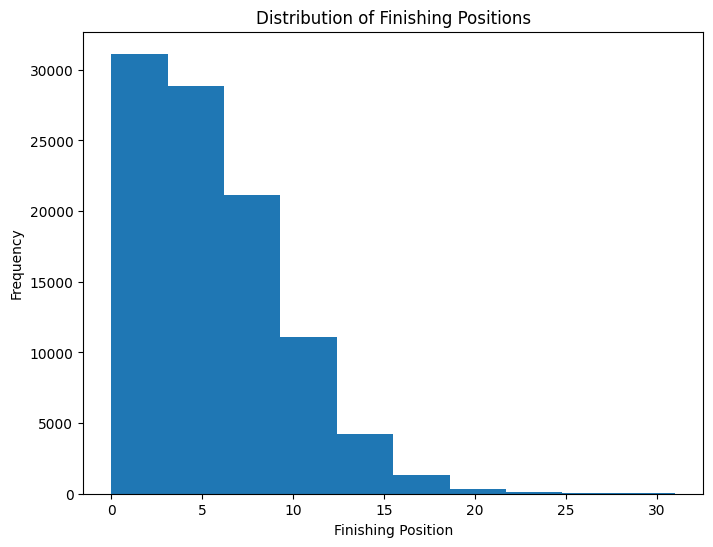

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['calc_position'], bins=10)
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')
plt.title('Distribution of Finishing Positions')
plt.show()

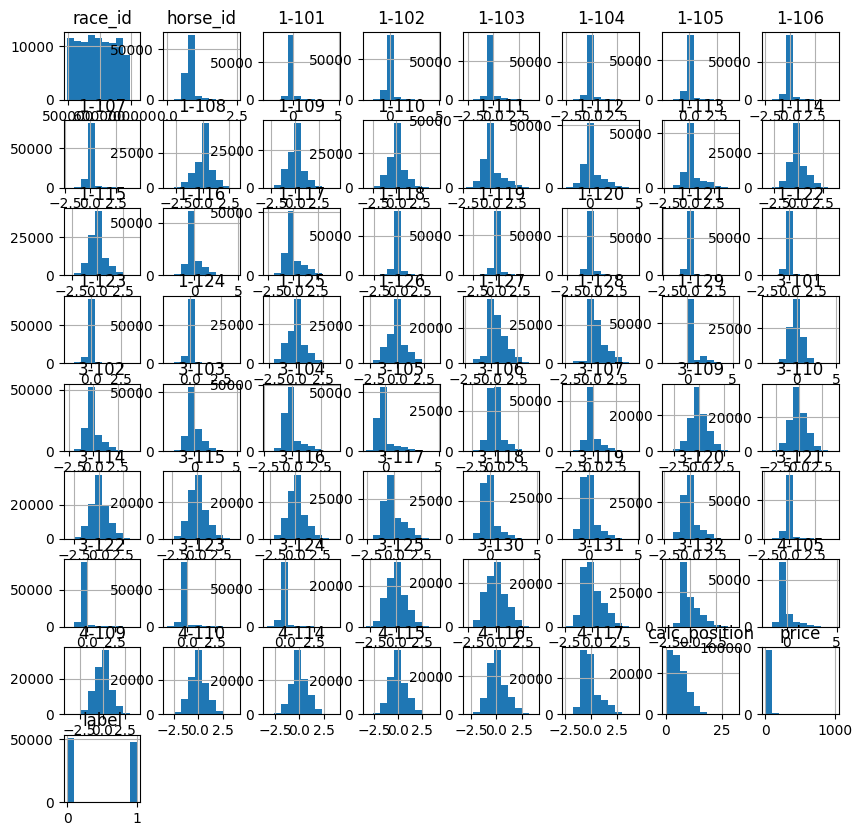

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

In [ ]:
race_onehot = pd.get_dummies(df['race_id'], prefix='Race')
df = pd.concat([df, race_onehot], axis=1)
df.drop(columns=['race_id'], inplace=True)

df.head()

,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,1-109,...,Race_691306,Race_691329,Race_691331,Race_691338,Race_691538,Race_691540,Race_691872,Race_691908,Race_691981,Race_719014
0,565129,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.71,0.78,...,False,False,False,False,False,False,False,False,False,False
1,607093,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.05,0.78,...,False,False,False,False,False,False,False,False,False,False
2,637337,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,-0.97,1.60,...,False,False,False,False,False,False,False,False,False,False
3,659819,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.21,-0.88,...,False,False,False,False,False,False,False,False,False,False
4,661530,-0.035803,-0.038562,-0.040769,-0.04615,-0.062234,-0.04845,-0.058985,0.08,-0.05,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
horse_onehot = pd.get_dummies(df['horse_id'], prefix='Horse')
df = pd.concat([df, horse_onehot], axis=1)
df.drop(columns=['horse_id'], inplace=True)

df.head()

In [ ]:
target_variable = 'race_id'
X = df.drop(columns=[target_variable])
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=50, random_state=42)

mlp_classifier.fit(X_train, y_train)

y_pred = mlp_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:
# ROC Curve
y_prob = mlp_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

In [ ]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()